# Aula 3 - Numpy e Pandas

Nessa aula, iremos tratar dos seguintes conteúdos:
- Numpy Matrizes
- Métodos de Matrizes Numpy
- Pandas
- Series
- Métodos Pandas
- DataFrames
- Trabalhando com CSVs

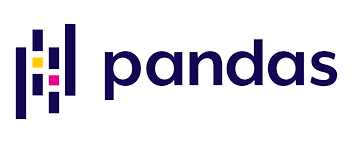

## Pandas

__Pandas__ é um pacote python construído com base no __NumPy__ e __Matplotlib__ que busca organizar dados no formato de tabela, atribuindo rótulos às linhas e colunas. O pacote __Pandas__ fornece ainda um conjunto de funcionalidades que permite processar as informações de tabelas de forma bastante eficiente, implementando métodos fundamentais para fins de tratamento de dados.

O Pandas organiza os dados nos seguintes tipos de estruturas:
- Series (Séries)
- DataFrame

 O __Pandas__ é um pacote e para utilizarmos, devemos importá-lo para o nosso notebook da seguinte forma:

In [1]:
import pandas as pd 

##   

### Series
A estrutura de representação tipo __Series__ do __Pandas__ é semelhante a um array unidimensional, porém os elementos podem ser indexados por números inteiros (como em um array do NumPy) ou por meio de rótulos (labels) que não precisam ser únicos e podem ser organizados de forma hierárquica.
- Quando os índices ou rótulos não são informados explicitamente, Pandas cria uma indexação com números inteiros automaticamente, variando os índices de $0$ (zero) a $n-1$, onde $n$ é o número de elementos na série.
- Os rótulos são usados para realizar buscas rápidas, alinhamento de dados e operações de junção de dados.

#### Criando séries com Pandas
Séries podem ser criadas no Pandas de diferentes formas, a partir de:
- Listas ou Arrays
- Dicionários
- DataFrames

### Utilizando Listas ou Arrays

Agora vamos criar uma Serie a partir de um __np.array__:

### Utilizando Dicionários

##   

### Indexação

Assim como para os arrays, conseguimos acessar diversos elementos da __Serie__ a partir dos __índices:__

Da mesma forma, conseguimos fazer o __Slicing__ em uma __Serie__:

##   

### Labels

Uma característica especial das __Series__ é que podemos escolher quais os __índices__ que queremos atribuir para cada um dos elementos e acessá-los a partir da __nova identifcação__ deles:

##   

### Operações Matemáticas

De maneira análoga ao que fizemos usando os __arrays__, pode-se fazer qualquer tipo de manipulação matemática utilizando as __Series__:

##   

## Métodos Pandas

Justamente pela biblioteca __Pandas__ utilizando do NumPy para a construção da sua arquitetura, muito dos métodos que são nativos do NumPy também vão funcionar com o __Pandas__, além de alguns novos métodos que veremos a seguir:

__sort_values__: este método ordena a Serie de acordo com os valores númericos dos elementos:

__unique:__ este método retorna todos os __valores distintos__ dentro de uma __Serie__:

__nunique:__ este método retorna a quantidade de __valores distintos__ dentro de uma __Serie__:

__value_counts:__ este método retorna as __frequências (contagens)__ para cada um dos __elementos distintos__ dentro de uma Serie:

Podemos também ao invés de retorna as frequências, retornar as __proporções__ de cada um dos __elementos distintos__:

A seguir teremos alguns outros métodos já conhecidos do __NumPy__ que retorna algumas estatísticas básicas para a Serie:

__describe:__ este é um método muito útil que vai trazer um resumos das __principais estátisticas__ da Serie que estamops trabalhando:

##   

## Exercícios

**1)** Cria uma série de pandas que tenha os números inteiros de 0 a 100.

In [4]:
import pandas as pd
import numpy as np 

serie = pd.Series(np.arange(0, 101))
print(serie)

0        0
1        1
2        2
3        3
4        4
      ... 
96      96
97      97
98      98
99      99
100    100
Length: 101, dtype: int64


**2)** Considere uma série de notas de alunos:
 
 notas = pd.Series([10, 8, 6.5, 9, 7.5, 8.5, 9, 9, 4, 8.5, 7.5,
                   8, 10, 10, 4.5, 4.5, 9, 8, 8, 9, 9, 9, 6.5,
                   5, 6, 4.5, 9, 10, 1, 0,5, 7, 9, 6.5, 5, 8])
                   
Determine:

**a)** A nota média

**b)** O desvio padrão

**c)** A moda

**d)** A mediana

In [21]:
notas = pd.Series([10, 8, 6.5, 9, 7.5, 8.5, 9, 9, 4, 8.5, 7.5, 8, 10, 10, 4.5, 4.5, 9, 8, 8, 9, 9, 9, 6.5, 5, 6, 4.5, 9, 10, 1, 0,5, 7, 9, 6.5, 5, 8])

resumo = notas.describe()
media = notas.mean()
desvio = notas.std()
moda = notas.mode()
mediana = notas.median()
# print(media[])
mediana

np.float64(8.0)

## DataFrame

__DataFrames__ assim como na mesma analogia para as matrizes, são um __conjunto de Series__ que vão ser bem caracterizados pelo o seu formato tabular (o que facilita muito o processo de manipulação dos dados!):

In [ ]:
# Cria um dicionario com nomes de alunos e suas respectivas notas
dictionary = {'Alunos': ['Sandro', 'Rafael', 'Tiago', 'André', 'Camila', 'Teo', 'Carlos', 'Juca', 'Carla'],
              'Notas': [8, 10, 9.5, 7.5, 9.5, 10, 5, 6.5, 10]}

# Cria um DataFrame a partir de um dicionario
df = pd.DataFrame(dictionary)

# Mostra o resultado do DataFrame
df

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
3,André,7.5
4,Camila,9.5
5,Teo,10.0
6,Carlos,5.0
7,Juca,6.5
8,Carla,10.0


Todo o processo que vimos sobre __indexação__ e __métodos__  para as Series são válidas também quando trabalhamos com __DataFrames:__

__Método loc:__ Este é um método especial para quando queremos acessar os elementos de um DataFrame, onde podemos acessar utilizando apenas os índices ou mesmo passando duas posições específicas:

## Máscaras Booleanas

Podemos fazer filtros no __DataFrame__ definindo como que para os arrays, as __máscaras booleanas:__

## Exercícios

### Para o Dataframe de Alunos utilizado

**1)** Encontre a nota média dos alunos

**2)** A nota do Juca

**3)** Os alunos com nota menor que 6.5

**4)** Peça a descrição das notas para ter insights interessantes

**5)** A moda das notas acima de 7

##   

##   

## Trabalhando com CSVs

O __Pandas__ tem algumas funcionalidades bem interessantes, como por exemplo permitir que carregue para o Notebook arquivos no formato csv, excel, xlsx e etc. Vamos ver uma aplicação como o CSV:

In [ ]:
# Carrega um arquivo CSV
df = pd.read_csv('../datasets/titanic.csv')
## .. -> Sobe de pasta
## /<nome_da_pasta> entra na pasta

# Print do DataFrame
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


[Neste Link](https://www.kaggle.com/c/titanic/data), conseguimos mais informações sobre a base de dados do Titanic! O Kaggle é uma plataforma muito conheciida no quesito de competições de Data Science e Machine Learning, além de disponibilizar diversos conjuntos de dados para treinarmos =)

Vamos testar alguns outros __métodos__ disponíveis para os DaataFrames:

__Método head/tail:__ São métodos muito importantes que mostram na tela as primeiras e últimas linhas respectivamente de um __DataFrame__:

##    

## Exercícios

### Para o Dataframe do Titanic

**1)** Faça a leitura do Dataframe e mostre as 5 primeiras linhas

**2)** Calcule a tarifa média por Sexo

**3)** Determine o passageiro que pagou a maior tarifa

**4)** Determine a idade média dos sobreviventes

__5)__ Determinem a classe com mais sobreviventes proporcionalmente

## Desafio

1 - Escolha um dataset do [Kaggle](https://www.kaggle.com/), explore seus dados e traga uma informação interessante que você encontrou. Esta prática é bastante importante para familizariação com a exploração de dataframes

## Links, Artigos e Referências:

- [Documentação do Pandas](https://pandas.pydata.org/docs/), documentação onde vocês podem encontrar mais informações sobre os métodos e funções do Pandas e descobrir novos métodos que não foram apresentados no curso;
- ["10 Python Pandas Tricks that make your work more efficient",](https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba) artigo escrito pelo Towards Data Science;
- ["28 useful Pandas functions you might not know"](https://paulovasconcellos.com.br/28-useful-pandas-functions-you-might-not-know-de42c59db085https://medium.com/@zachary.bedell/writing-beautiful-code-with-numpy-505f3b353174), artigo escrito por Paulo Vasconcellos para o Data Hackers;